# Entrega - Aula 9

# Arthur Rizzo, Felipe Goichman e Lucas Borges

# Turma C

In [4]:
%matplotlib inline
from scipy.stats import lognorm
from scipy.stats import t
from scipy import stats

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
tempos = pd.Series.from_csv("tempos.csv")

2) Há outros modelos probabilísticos contínuos:

* Uniforme
* Normal
* Gamma
* t-Student
* LogNormal
* Beta
* F-Snedecor


Cada grupo de alunos deve ficar com uma distribuição e deve realizar as seguintes atividades (**num IPython Notebook à parte**, que deve ser publicado no **Github** e ter seu link divulgado para a sala até 24/9):


2.1. Gere um plot da densidade de probabilidade da distribuição e de sua cumulativa. Descubra como usando o pacote scipy.stats

2.2. Qual a forma analítica (expressão) da distribuição?

2.3. Quais parâmetros descrevem a distribuição?

2.4. Existe uma fórmula específica para calcular esperança (média) e variáncia em função dos parâmetros?

2.5. Que tipo de aplicações tem esta distribuição? Em que tipo de dados é normalmente encontrada?

2.6. Essa distribuição é útil para a inferência estatística? (Os Capítulos 7 e 8 do Magalhães darão uma idéia de se sim ou não)


In [5]:
tempos.describe()  # Dados do arquivo

count    100.000000
mean       0.859656
std        0.954113
min        0.012487
25%        0.309008
50%        0.540032
75%        1.001301
max        5.651270
dtype: float64

# LOGNORMAL

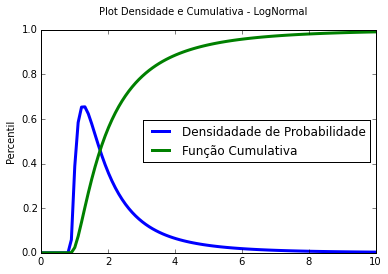

In [8]:
stddev = tempos.std() # Desvio Padrão
mean = tempos.mean() # Média

x=np.linspace(0,10,100) # Valor inicial, Valor Final, Número de elementos

dist=lognorm([stddev],loc=mean) # Função de parâmetro sigma (desvio padrão) e mi (média)

plt.plot(x,dist.pdf(x), lw= 3) # Plota a densidade de probabilidade de distribuição (Probability density function)
plt.plot(x,dist.cdf(x), lw = 3) # Plota a cumulativa (Cumulative density function.)
plt.suptitle("Plot Densidade e Cumulativa - LogNormal") # Título 
years = ["Densidadade de Probabilidade", 'Função Cumulativa'] # Lista com as legendas
plt.legend(years,loc='best') # loc='best' ajeita de melhor maneira a caixa de legendas
plt.ylabel('Percentil') # Legenda no eixo Y

**Expressão (forma analítica) da distruibuição**

$$f(x;\mu ,\sigma ) = \left\{\begin{matrix}
\frac{1}{x\sigma \sqrt{2\pi }}exp\left [ \frac{-(log(x)-\mu )^2}{2\sigma ^2} \right ],  & x>0  & \\
 0,x\leq 0 & &  
\end{matrix}\right.$$



**Parâmetros**

$$x=Varíavel\: aleatória \\
\mu = Média \\
\sigma=Desvio\:Padrão$$

**Cálculo da média**

$$E(X) = exp\left ( \mu  + \frac{\sigma ^2}{2} \right )$$

**Cálculo da variância**
$$ Var(X)=exp(2\mu +\sigma ^2)\left ( exp(\sigma ^2)-1 \right )$$

**Aplicações e Usos**

A importância da distribuição log-normal se deve a um resultado análogo ao Teorema do Limite Central: assim como uma distribuição normal aparece quando são somadas várias variáveis independentes (para ver o enunciado mais preciso, consulte o artigo sobre o teorema), a distribuição log-normal aparece naturalmente como o produto de várias variáveis independentes (sempre positivas).

A distribuição Log-Normal é muito usada para caracterizar tempo de vida de produtos e materiais. Isto inclui fadiga de metal, semicondutores, diodos e isolação elétrica.

**Inferência**

Essa distribuição pode ter uma inferência quando se tem um grande valor de amostra. Quanto maior a amostra maior será aproximação entre o prático e o téorico.

# T-STUDENT

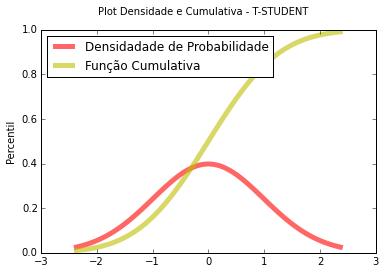

In [7]:
df = 99 # Graus de liberdade
x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100) # ppf gera somente uma saída
plt.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf') # Plota Densidade de Probabilidade
plt.plot(x, t.cdf(x, df),'y', lw=5, alpha=0.6, label='t cdf') # Plota Função Cumulativa
plt.suptitle("Plot Densidade e Cumulativa - T-STUDENT") # Título 
years = ["Densidadade de Probabilidade", 'Função Cumulativa'] # Lista com as legendas
plt.legend(years,loc='best') # loc='best' ajeita de melhor maneira a caixa de legendas
plt.ylabel('Percentil') # Legenda no eixo Y

**Expressão (forma analítica) da distruibuição**


$$f(v) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}$$

**Parâmetros**
$$ v=Graus\:de\:liberdade \\ $$

**Cálculo da média**

$$S_n^{\;2} = \frac{1}{n-1}\sum_{i=1}^n\left(X_i-\overline{X}_n\right)^2$$

**Cálculo da Variância**

$$ V = (n-1)\frac{S_n^2}{\sigma^2}   $$

**Aplicações e Usos**


A distribuição t de Student é uma das distribuições mais utilizadas na estatística, com aplicações que vão desde a modelagem estatística até testes de hipóteses. Seu gráfico é muito próximo a uma distribuição normal (porém com caudas mais largas, gerando valores mais extremos) e quanto maior o grau de liberdade maior será essa aproximação. 


Sua importância se deve a vários fatores, entre eles podemos citar o teorema central do limite, o qual é um resultado fundamental em aplicações práticas e teóricas, pois ele garante que mesmo que os dados não sejam distribuídos segundo uma normal a média dos dados converge para uma distribuição normal conforme o número de dados aumenta. Além disso diversos estudos práticos tem como resultado uma distribuição normal. Podemos citar como exemplo a altura de uma determinada população em geral segue uma distribuição normal. 

**Inferência**

Essa distribuição, semelhante a distribuição normal pode ser usado para inferir uma determinada população. Na natureza encontramos diversos exemplos de distribuições que se encontram na fórmula dessa distribuição.